# Logistic Regression

In [1]:
import pandas as pd

In [2]:
# import data
data = pd.read_csv("toxicity.csv", sep = ";", header = None)

In [3]:
data.info

<bound method DataFrame.info of       0     1     2     3     4     5     6     7     8     9     ...  1015  \
0        0     0     0     0     0     0     0     0     0     0  ...     0   
1        0     0     1     0     0     0     0     0     0     0  ...     0   
2        0     0     0     0     0     0     0     0     0     0  ...     0   
3        0     0     0     0     0     0     0     1     0     0  ...     0   
4        0     0     0     0     0     0     0     0     0     0  ...     0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
8987     0     0     0     0     0     0     0     1     0     0  ...     0   
8988     0     1     0     0     0     1     0     1     0     0  ...     0   
8989     0     0     0     0     0     0     0     1     0     0  ...     0   
8990     0     0     0     0     0     0     0     0     0     0  ...     0   
8991     0     0     1     0     0     0     0     0     0     0  ...     1   

      1016  1017  1

In [4]:
# encoding
data[1024] = data[1024].map({"negative": 0, "positive": 1})

In [5]:
data.info

<bound method DataFrame.info of       0     1     2     3     4     5     6     7     8     9     ...  1015  \
0        0     0     0     0     0     0     0     0     0     0  ...     0   
1        0     0     1     0     0     0     0     0     0     0  ...     0   
2        0     0     0     0     0     0     0     0     0     0  ...     0   
3        0     0     0     0     0     0     0     1     0     0  ...     0   
4        0     0     0     0     0     0     0     0     0     0  ...     0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
8987     0     0     0     0     0     0     0     1     0     0  ...     0   
8988     0     1     0     0     0     1     0     1     0     0  ...     0   
8989     0     0     0     0     0     0     0     1     0     0  ...     0   
8990     0     0     0     0     0     0     0     0     0     0  ...     0   
8991     0     0     1     0     0     0     0     0     0     0  ...     1   

      1016  1017  1

In [6]:
num_observations = data.shape[0]
num_features = data.shape[1] - 1

print(num_observations)
print(num_features)

8992
1024


In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_text, train = True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict = True))
        print("Train Result:\n===========================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("--------------------------------------------------------------------------")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("--------------------------------------------------------------------------")
        print(f"Confusion Matrix:\n {confusion_matrix(y_train, pred)}")
        train_error_rate = 1 - accuracy_score(y_train, pred)
        print(f"Train Error Rate: {train_error_rate * 100:.2f}%\n\n")
        
    elif train == False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict = True))
        print("Test Result:\n============================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:2f}%")
        print("--------------------------------------------------------------------------")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("--------------------------------------------------------------------------")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}")
        test_error_rate = 1 - accuracy_score(y_test, pred)
        print(f"Test Error Rate: {test_error_rate * 100:.2f}%\n")

In [27]:
# split dataset into train and test data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [28]:
# logistic regression
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver = 'liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train = True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train = False)

Train Result:
Accuracy Score: 96.50%
--------------------------------------------------------------------------
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.969706    0.889671  0.964966     0.929689      0.963208
recall        0.992888    0.648973  0.964966     0.820931      0.964966
f1-score      0.981160    0.750495  0.964966     0.865828      0.962433
support    6609.000000  584.000000  0.964966  7193.000000   7193.000000
--------------------------------------------------------------------------
Confusion Matrix:
 [[6562   47]
 [ 205  379]]
Train Error Rate: 3.50%


Test Result:
Accuracy Score: 91.828794%
--------------------------------------------------------------------------
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.944147    0.543103  0.918288     0.743625      0.909148
recall        0.967722    0.401274  0.918288     0.684498      0.918288
f1-s

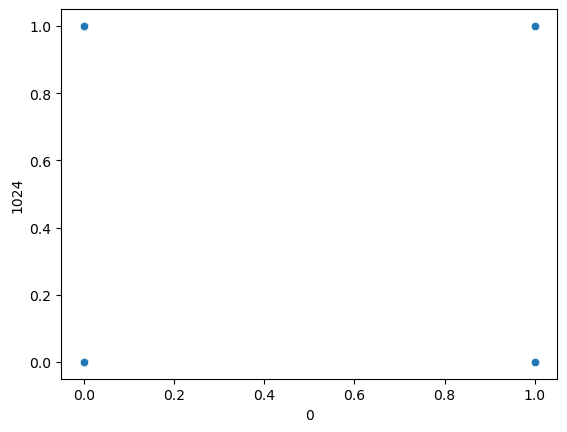

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x = data[0], y = data[1024])
plt.show()

In [71]:
# lda
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Assuming your dataset is stored in 'X' and the corresponding class labels in 'y'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lda = LinearDiscriminantAnalysis()

# Fit the LDA model to the training data
lda.fit(X_train, y_train)

# Predict class labels for the test data
y_pred_lda = lda.predict(X_test)

# Compute the confusion matrix
cm_lda = confusion_matrix(y_test, y_pred_lda)
print("Confusion Matrix (LDA):")
print(cm_lda)

Confusion Matrix (LDA):
[[1589   53]
 [  81   76]]


In [72]:
# qda
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Assuming your dataset is stored in 'X' and the corresponding class labels in 'y'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

qda = QuadraticDiscriminantAnalysis()

# Fit the QDA model to the training data
qda.fit(X_train, y_train)

# Predict class labels for the test data
y_pred_qda = qda.predict(X_test)

# Compute the confusion matrix
cm_qda = confusion_matrix(y_test, y_pred_qda)
print("Confusion Matrix (QDA):")
print(cm_qda)

Confusion Matrix (QDA):
[[1641    1]
 [ 154    3]]


C:\Users\User\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
